In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
# Need to change to the cleaned datasets later
train_data = pd.read_csv('../data/processed/train_features.csv')
#test_data = pd.read_csv('../data/test.csv')

In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinDeck,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unknown,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Unknown,1


In [56]:
X = train_data[['Sex','Pclass','FamilySize']].copy()
y = train_data['Survived']
#X.shape

In [57]:
#Map male/female to 0/1 , this line of code is not needed when we used cleaned datasets.
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

print(X.head())


   Sex  Pclass  FamilySize
0    0       3           2
1    1       1           2
2    1       3           1
3    1       1           2
4    0       3           1


In [37]:
# X_sex is data with Sex as only feature
X_sex = X[['Sex']].copy()
X_pclass = X[['Pclass']].copy()
type(X_sex)

pandas.DataFrame

In [ ]:
# test_train split is tested on 0.1,0.2,0.3, and 0.1 gives the highest test accuracy 

accuracy = []
number_of_features = X.shape[1]
for i in range(number_of_features):
    data = X.iloc[:,[i]]
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    accuracy.append(accuracy_score(y_test, y_pred)) 
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [60]:
# use all the columns/features in the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 
accuracy.append(accuracy_score(y_test, y_pred)) 

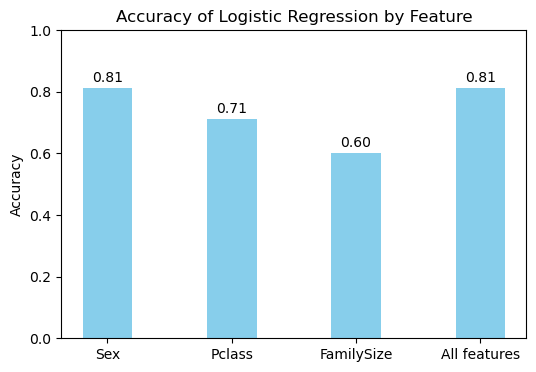

In [61]:
features = list(X.columns) #['Sex', 'Pclass', 'FamilySize']
features.append('All features')
# Plot
plt.figure(figsize=(6,4))
for i, acc in enumerate(accuracy):
    plt.bar(features[i], acc, color='skyblue',width=0.4)
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')  

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression by Feature')
plt.show()